In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the .xlsx file
df = pd.read_excel("Online retail.xlsx", header = None)
dg = df[0].str.split(',', expand=True)
     

In [7]:
print(dg)

                 0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs              None   
2           chutney               None         None              None   
3            turkey            avocado         None              None   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread              None   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken               None         None              None   
7499       escalope          green tea         None              None   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cot

In [9]:
# One hot encoding

In [11]:


grocery_items = set()
for col in dg.columns:
    grocery_items.update(dg[col].unique())

output_list = list()
for _, row in dg.iterrows():
    row_val = {item: 0 for item in grocery_items}
    row_val.update({item: 1 for item in row if pd.notna(item)})
    output_list.append(row_val)

grocery = pd.DataFrame(output_list)

grocery.head()
     

,hand protein bar,mayonnaise,gums,protein bar,None,sparkling water,spaghetti,light cream,shallot,pasta,...,tomato sauce,flax seed,candy bars,nonfat milk,burgers,champagne,extra dark chocolate,milk,ground beef,white wine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
grocery.columns.tolist()

['hand protein bar',
 'mayonnaise',
 'gums',
 'protein bar',
 None,
 'sparkling water',
 'spaghetti',
 'light cream',
 'shallot',
 'pasta',
 'strawberries',
 'sandwich',
 'fromage blanc',
 'low fat yogurt',
 'eggplant',
 'oil',
 'salmon',
 'fresh bread',
 'mashed potato',
 'french fries',
 'toothpaste',
 'tomatoes',
 'bramble',
 'strong cheese',
 'red wine',
 'whole weat flour',
 'dessert wine',
 'gluten free bar',
 'bacon',
 'mint green tea',
 'antioxydant juice',
 'energy drink',
 'green tea',
 'oatmeal',
 'cooking oil',
 'whole wheat rice',
 'spinach',
 'parmesan cheese',
 'brownies',
 'ketchup',
 'babies food',
 'hot dogs',
 'cereals',
 'pepper',
 'pancakes',
 'blueberries',
 'mint',
 'black tea',
 'meatballs',
 'herb & pepper',
 'tea',
 'cauliflower',
 'chocolate',
 'french wine',
 'melons',
 'mushroom cream sauce',
 'yams',
 'soup',
 'carrots',
 'pickles',
 ' asparagus',
 'shampoo',
 'soda',
 'cider',
 'zucchini',
 'turkey',
 'whole wheat pasta',
 'chicken',
 'grated cheese',
 'c

In [15]:

# View top sold items

total_item_count = sum(grocery.sum())
print("Total Item : ", total_item_count)
print()
item_summary = grocery.sum().sort_values(ascending = False).reset_index()
item_summary.rename(columns={item_summary.columns[0]:'item_name',item_summary.columns[1]:'item_count'}, inplace=True)
print("Item Summary:")
print(item_summary.head())

Total Item :  29358

Item Summary:
       item_name  item_count
0  mineral water        1788
1           eggs        1348
2      spaghetti        1306
3   french fries        1282
4      chocolate        1229


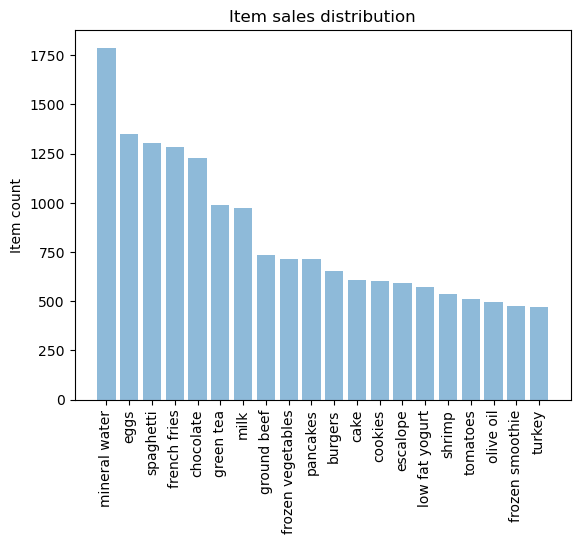

In [17]:

# Visualize top sold items

objects = (list(item_summary['item_name'].head(n=20)))
y_pos = np.arange(len(objects))
performance = list(item_summary['item_count'].head(n=20))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Item count')
plt.title('Item sales distribution')
plt.show()
     

In [19]:

# Generating frequent item sets

frequent_itemsets = apriori(grocery, min_support=0.047, use_colnames=True)

In [21]:
# Generating rules

my_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [23]:
#viewing top 100 rules

my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
1,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
2,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
3,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
4,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
5,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
7,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950


# Interview Questions:

1.	What is lift and why is it important in Association rules?

Lift is a measure used in association rule mining to evaluate the importance and strength of a rule. It helps in understanding how much more
likely the occurrence of the rule's consequent is, given the antecedent, compared to the occurrence of the consequent in the general dataset.

Importance of Lift
Identifies Strong Rules: A lift value greater than 1 indicates a positive correlation between A and B, meaning the occurrence of A makes B more likely.
A value less than 1 indicates a negative correlation.

Eliminates Independent Associations: Lift helps in filtering out the rules that do not show a significant association. Rules with lift close to 1 
suggest that the occurrence of A and B together is not more likely than by random chance.

Measures Predictive Power: Lift gives insight into the potential predictive power of the association rule, making it crucial for actionable insights.



2.	What is support and Confidence. How do you calculate them?

   Support and confidence are crucial metrics in association rule mining:

Support
Definition: Support measures how frequently an itemset appears in the dataset.

Calculation: \[ \text{Support}(A) = \frac{\text{Number of transactions containing } A}{\text{Total number of transactions}} \]

Confidence
Definition: Confidence measures how often items in 
Y
 appear in transactions that contain 
X
.

Calculation: \[ \text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cup Y)}{\text{Support}(X)} \]

3.	What are some limitations or challenges of Association rules mining?

Association rule mining is powerful, but it comes with its own set of challenges and limitations:

Scalability: Handling large datasets can be computationally expensive and time-consuming, especially with a high number of transactions and items.

Rare Item Problem: Items that appear infrequently might get ignored even if they have strong associations.

High Dimensionality: As the number of items increases, the number of possible itemsets grows exponentially, making the problem more complex.

Interpretability: Large numbers of rules can be generated, many of which might be redundant or trivial. Filtering out the useful ones can be difficult.

Parameter Sensitivity: The results can be highly sensitive to the minimum support and confidence thresholds set by the user, requiring careful tuning.

Actionability: Not all discovered associations are useful or actionable, leading to potential overload of irrelevant information.

Temporal Dynamics: Rules can change over time, and static models might not capture these evolving patterns accurately